# **OP-10 Exploratory Data Analysis**

# Setup
### Libraries

In [2]:
install.packages(
    c("psych"), dependencies = TRUE)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘nloptr’, ‘RcppEigen’, ‘psychTools’, ‘lme4’


Warning message in install.packages(c("psych"), dependencies = TRUE):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages(c("psych"), dependencies = TRUE):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages(c("psych"), dependencies = TRUE):
“installation of package ‘psych’ had non-zero exit status”
Warning message in install.packages(c("psych"), dependencies = TRUE):
“installation of package ‘psychTools’ had non-zero exit status”
Warning message in install.packages(c("psych"), dependencies = TRUE):
“installation of package ‘lme4’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
# Libraries
library(tidyverse)
library(zoo)
library(magrittr)
library(repr)
library(IRdisplay)
library(fpp3)
library(psych)
library(reshape2)
library(ggridges)
library(forcats)

ERROR: Error in library(psych): there is no package called ‘psych’


### Load Data

In [4]:
# Load data
measure.dataset.csv.path <- '../op-10/data/OP-10-no-backfill.csv'
measure.data <- read.csv(measure.dataset.csv.path)
measure.data %>% head()

,provider_id,score,lag1,lag2,year,quarter,lag_diff,prov_mean,prov_mean_diff
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,10001,4.6,4.6,4.6,2013,2,0.0,4.600000,0.000000
2,10001,6.5,4.6,4.6,2014,2,1.9,4.600000,1.900000
3,10001,6.4,6.5,4.6,2015,2,-0.1,5.550000,0.850000
4,10001,9.0,6.4,6.5,2016,2,2.6,5.833333,3.166667
5,10001,6.5,9.0,6.4,2017,2,-2.5,6.625000,-0.125000
6,10001,8.0,6.5,9.0,2018,2,1.5,6.600000,1.400000


# Summary Statistics

The SEP-01 dataset contains 42370 observations and ranges from 2017Q3 to 2021Q3 with relatively consistent reporting quantities. The median SEP-01 score is 57. The lower 10th percentile is 31, and the upper 90th percentile is 79. Half of all SEP-01 data lies between the range of 43 and 69. Historically, there was a slight drift upwards in the median score until 2019, when the SEP-01 scores stabilized. 

In [5]:
measure.data %>% nrow()

[1] 29096

In [6]:
measure.data %>% describe()

ERROR: Error in describe(.): could not find function "describe"


In [7]:
measure.data %$% score %>% describe(., quant = c(0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99))

ERROR: Error in describe(., quant = c(0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99)): could not find function "describe"


In [8]:
measure.data$y_quarter = paste0(measure.data$year, "Q",measure.data$quarter)

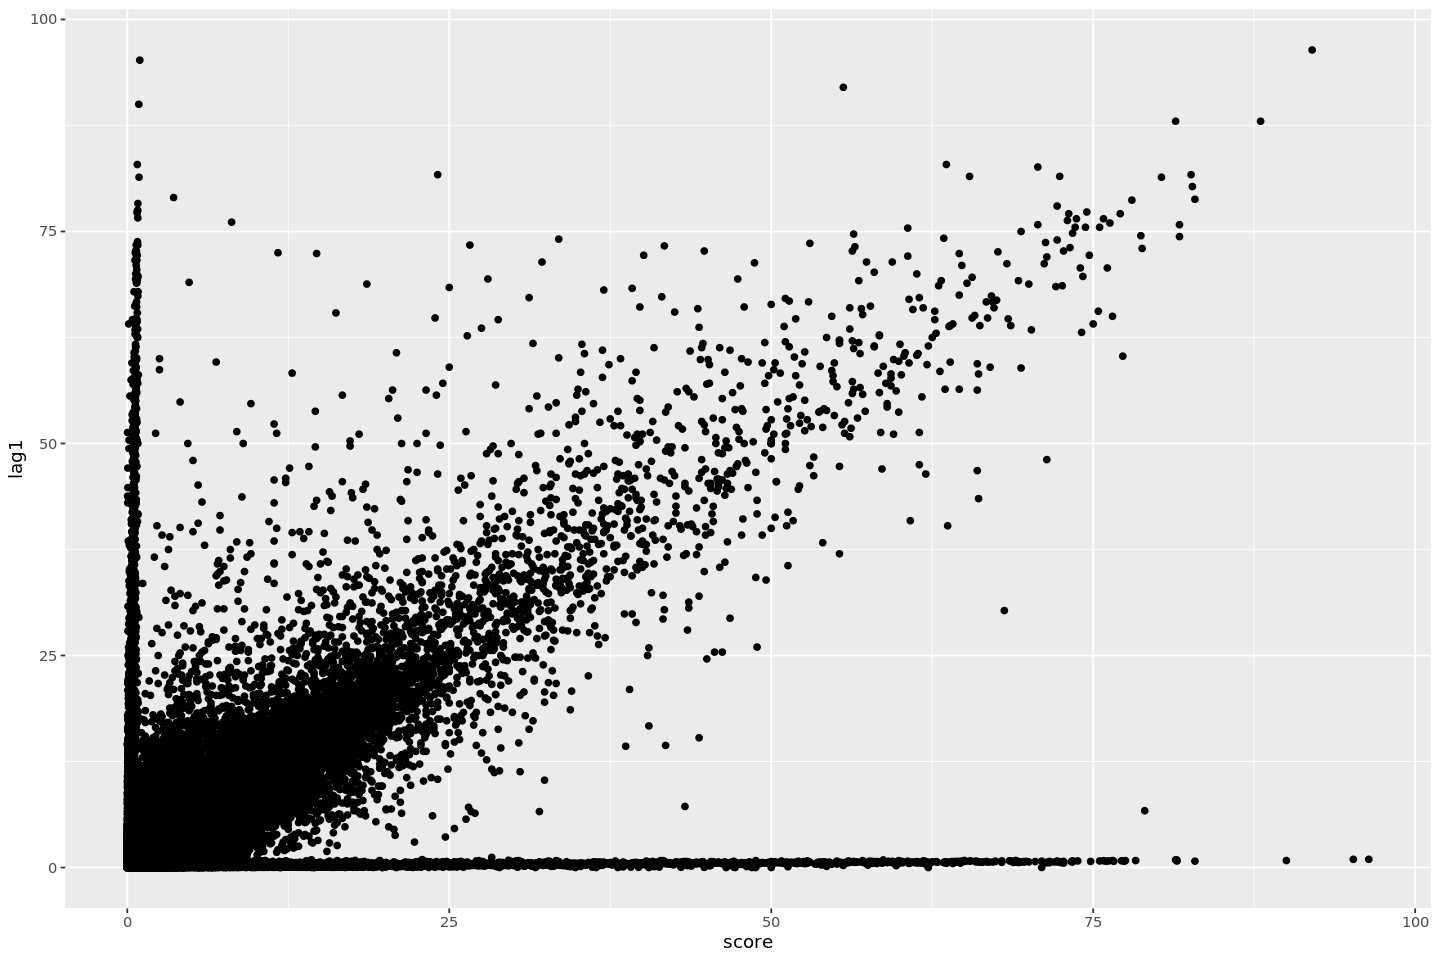

In [64]:
measure.data %>%
    ggplot(aes(x = score, y = lag1)) +
    geom_point()

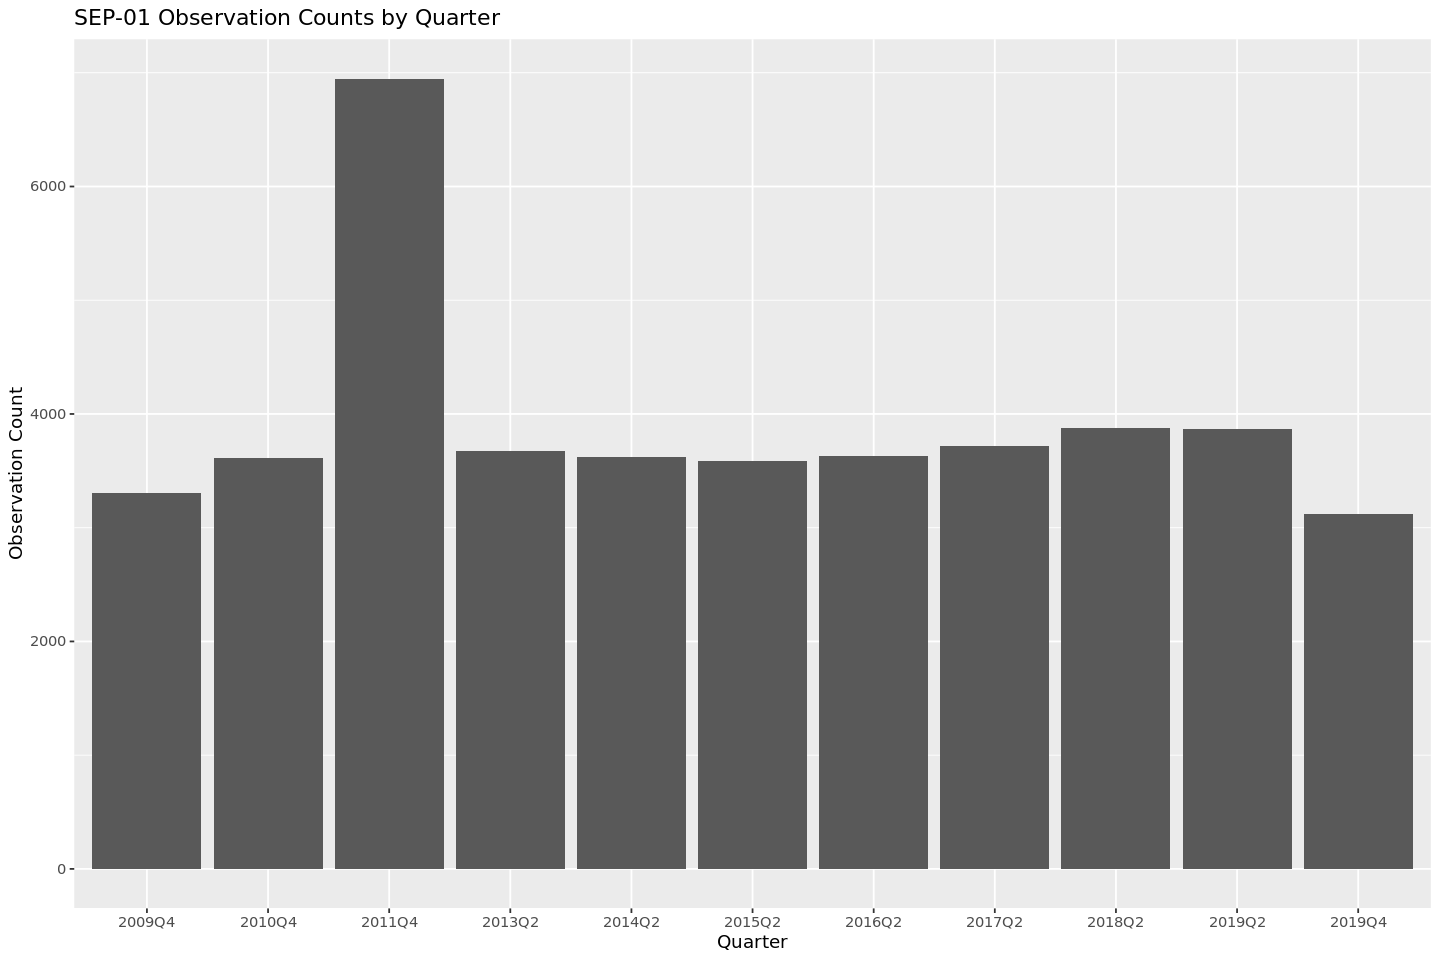

In [14]:
# Change plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)

measure.data %>%
    ggplot(aes(x = y_quarter)) +
    geom_bar() +
    xlab("Quarter") +
    ylab("Observation Count") +
    ggtitle("SEP-01 Observation Counts by Quarter")

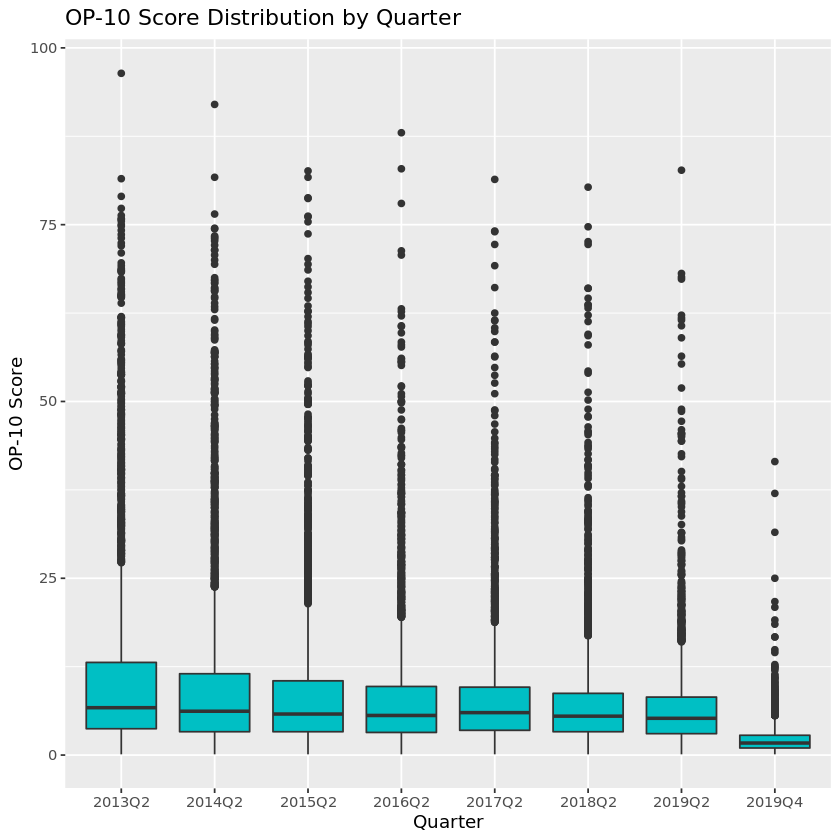

In [9]:
measure.data %>%
    ggplot(aes(x = y_quarter, y = score, group = y_quarter)) +
    ylab("OP-10 Score") +
    xlab("Quarter") +
    geom_boxplot(fill = "#00BFC4")+
    ggtitle("OP-10 Score Distribution by Quarter")

### Provider Analysis

The SEP-01 dataset contains 3320 unique providers. Most providers have 14 quarters of data. 3027 providers had 8 or more quarters of data and were thus included in the ACF Time Series Analysis.

In [10]:
measure.data %$% provider_id %>% n_distinct()

[1] 4297

In [19]:
provider.counts <- 
    measure.data %>%
    arrange(provider_id, y_quarter) %>%
    group_by(provider_id) %>%
    count() %>%
    rename(provider.n = n) %>% 
    arrange(-provider.n) 

provider.counts %>% head()

provider_id,provider.n
<int>,<int>
10001,12
10005,12
10006,12
10007,12
10011,12
10012,12


In [11]:
measure.data %>%
    arrange(provider_id,y_quarter) %>%
    count(provider_id) %T>% 
        {describe(., quant = c(.1,.25,.75,.9)) %>% display()} %>%
    ggplot(aes(n)) +
    xlab("Sequential Quarters of Data Avaiable") + 
    ylab("Provider Count") + 
    geom_histogram(bins = 14) +
    ggtitle("Provider Time Sequence Length")

ERROR: Error in describe(., quant = c(0.1, 0.25, 0.75, 0.9)): could not find function "describe"


In [52]:
measure.data.filtered <- measure.data %>%
    filter(y_quarter != "2019Q4") %>%
    arrange(provider_id,y_quarter) %>%
    group_by(provider_id) %>%
    filter(n() >= 8)

In [53]:
measure.data.filtered %$% provider_id %>% n_distinct()

[1] 3369

# Time Series Analysis

### Provider Level ACF Plots
From the handful of plot below, we see some evidence of autocorrelation among lags one and two. A ridge plot willl be applied to test this trend more broadly across all providers.

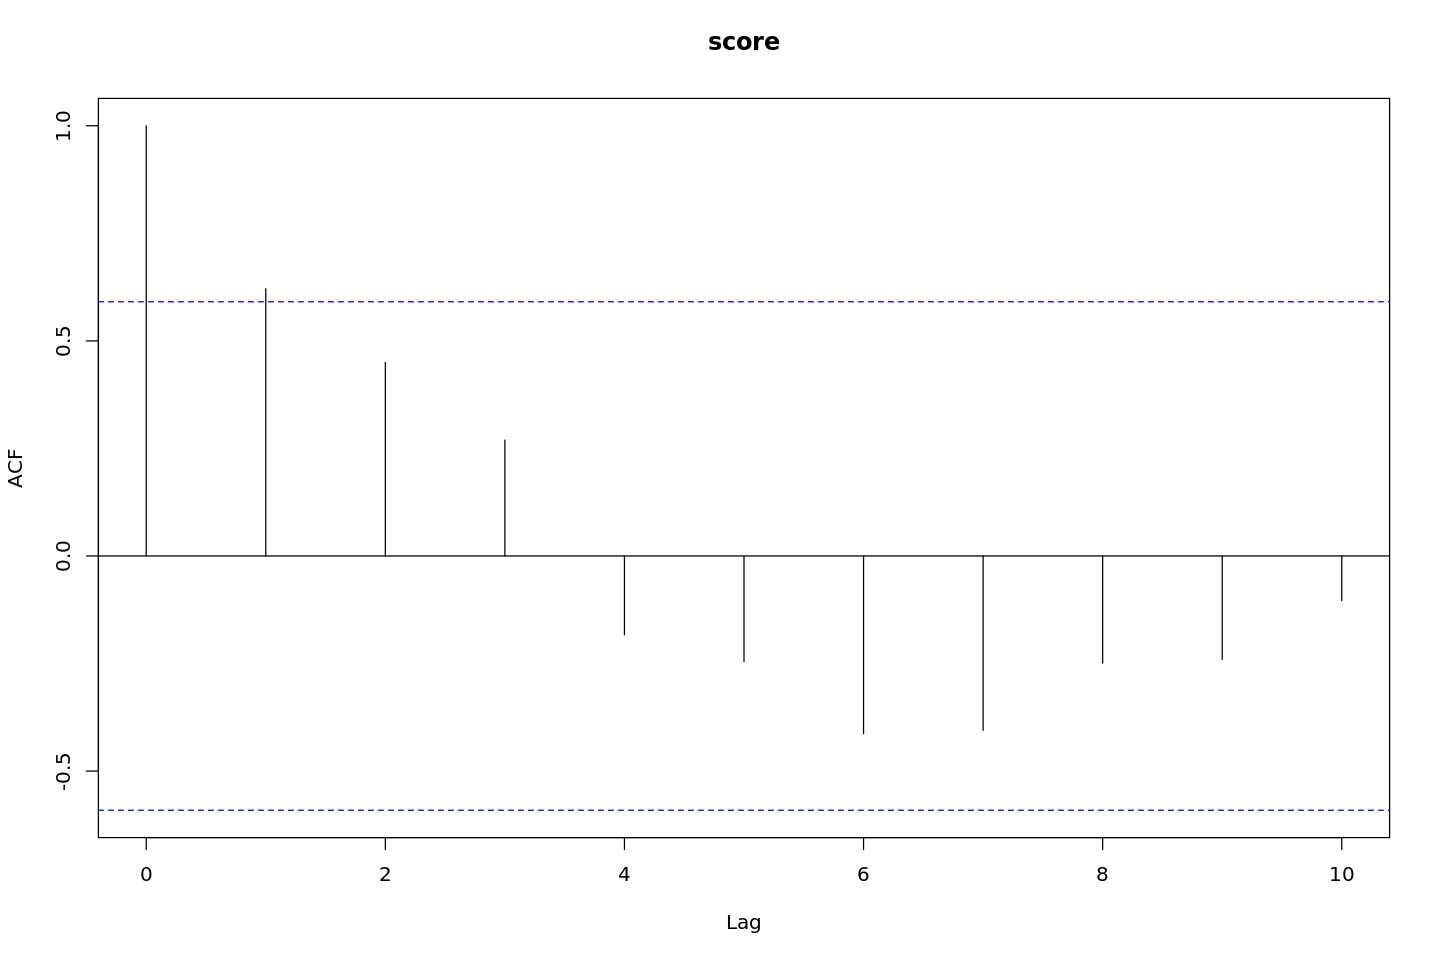

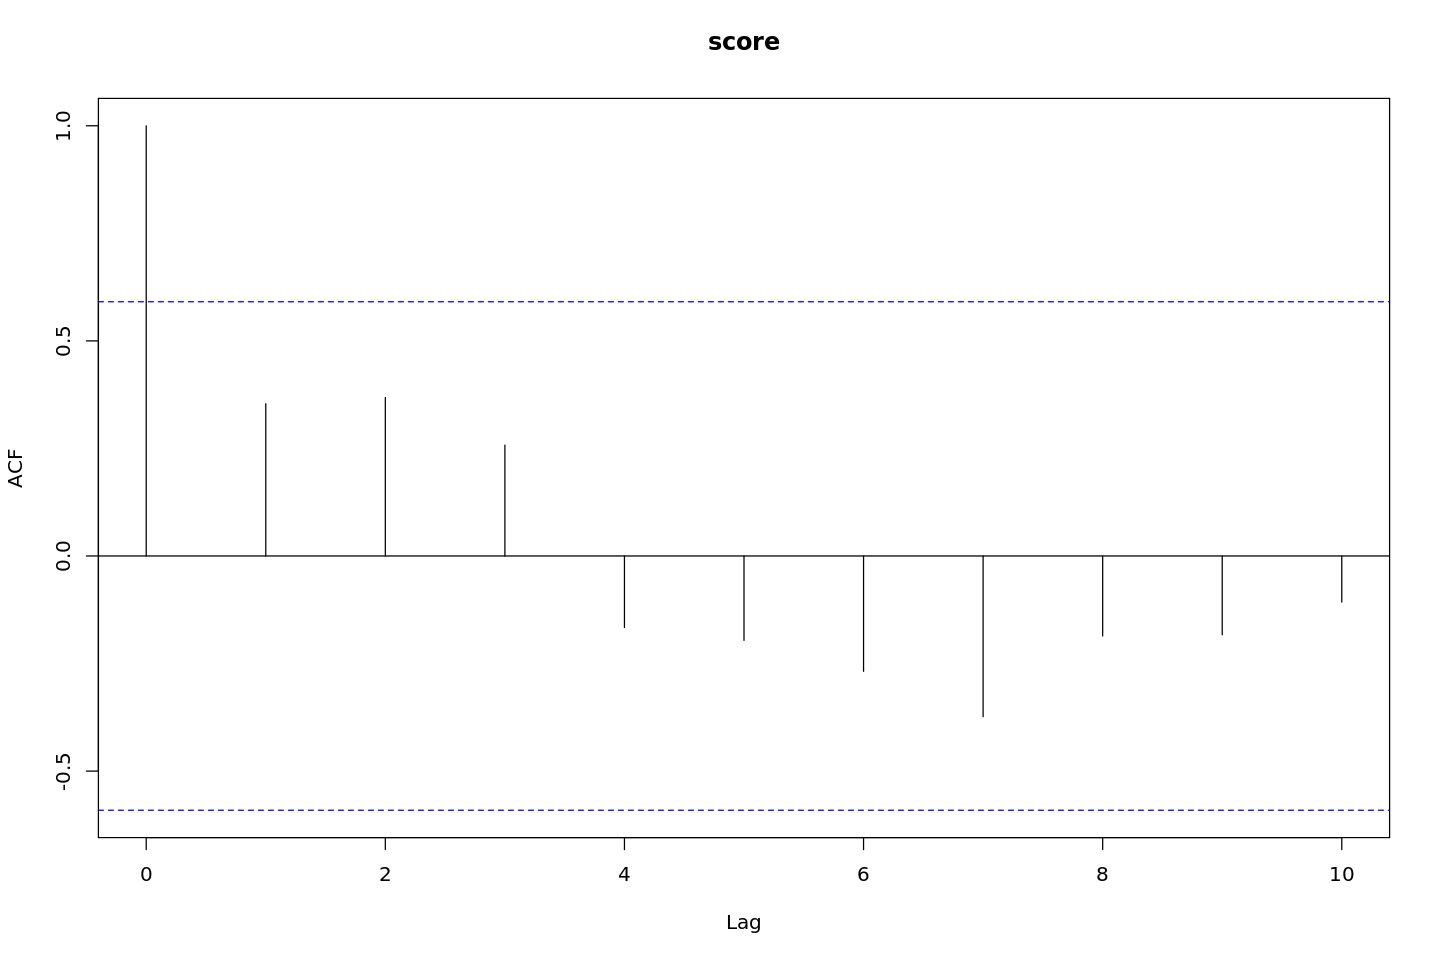

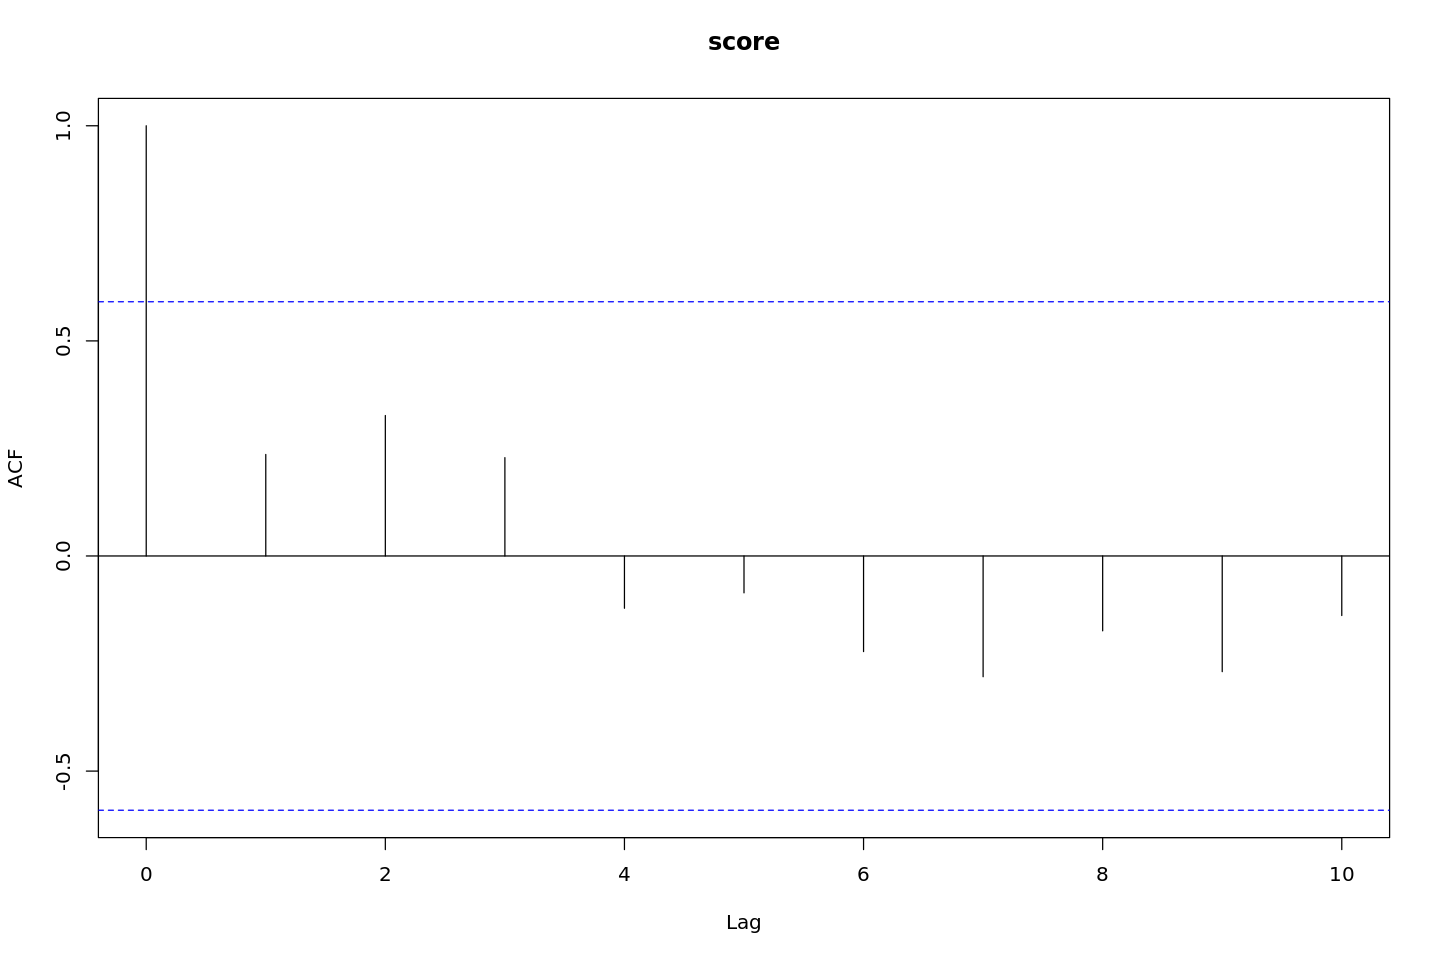

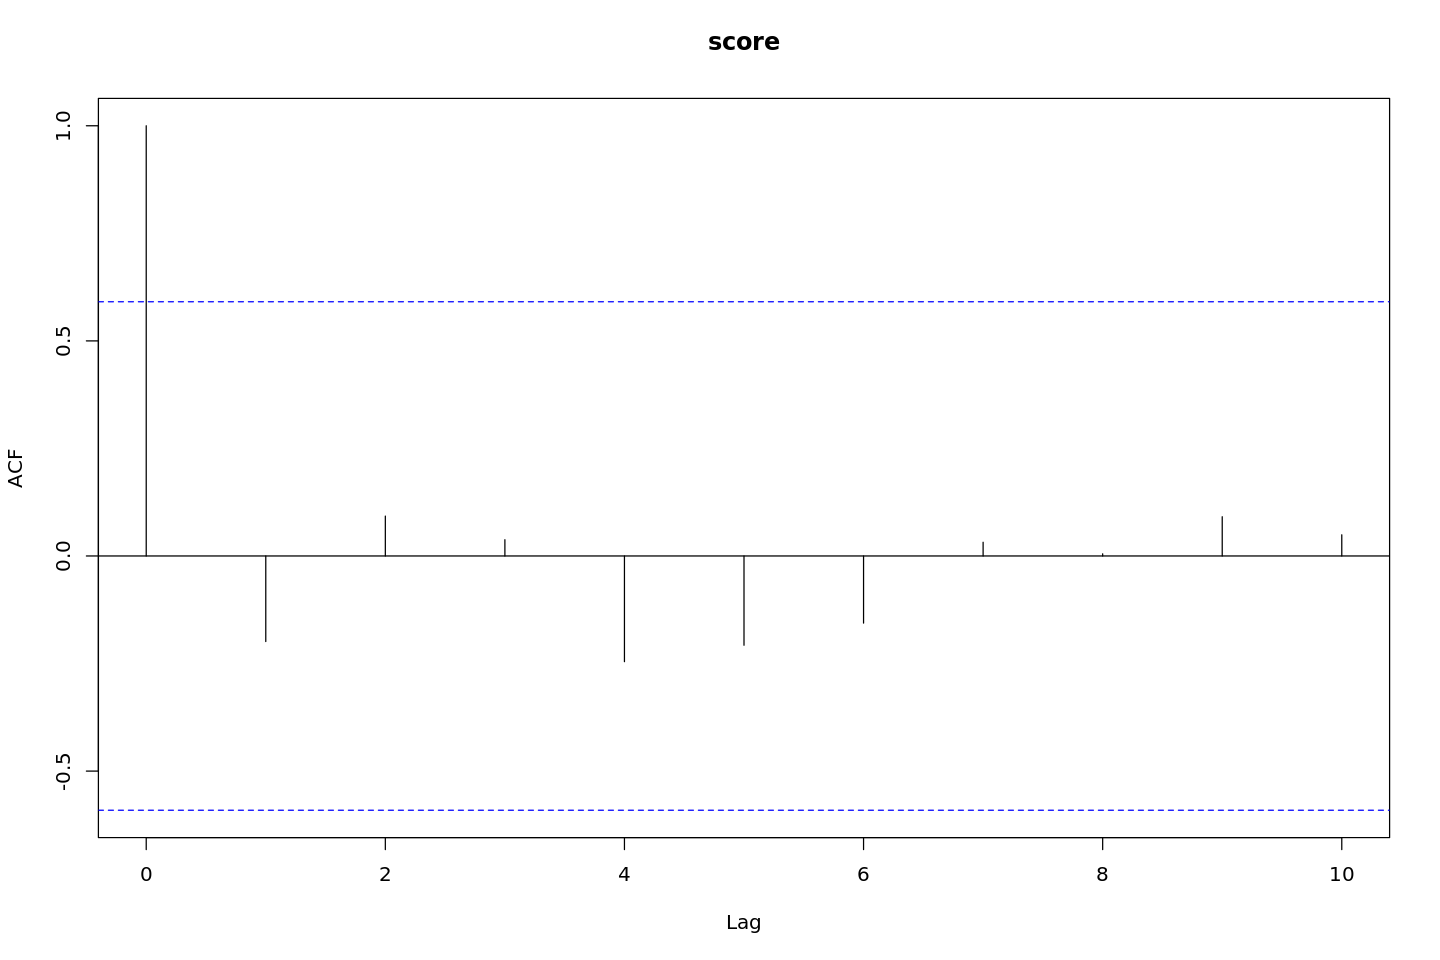

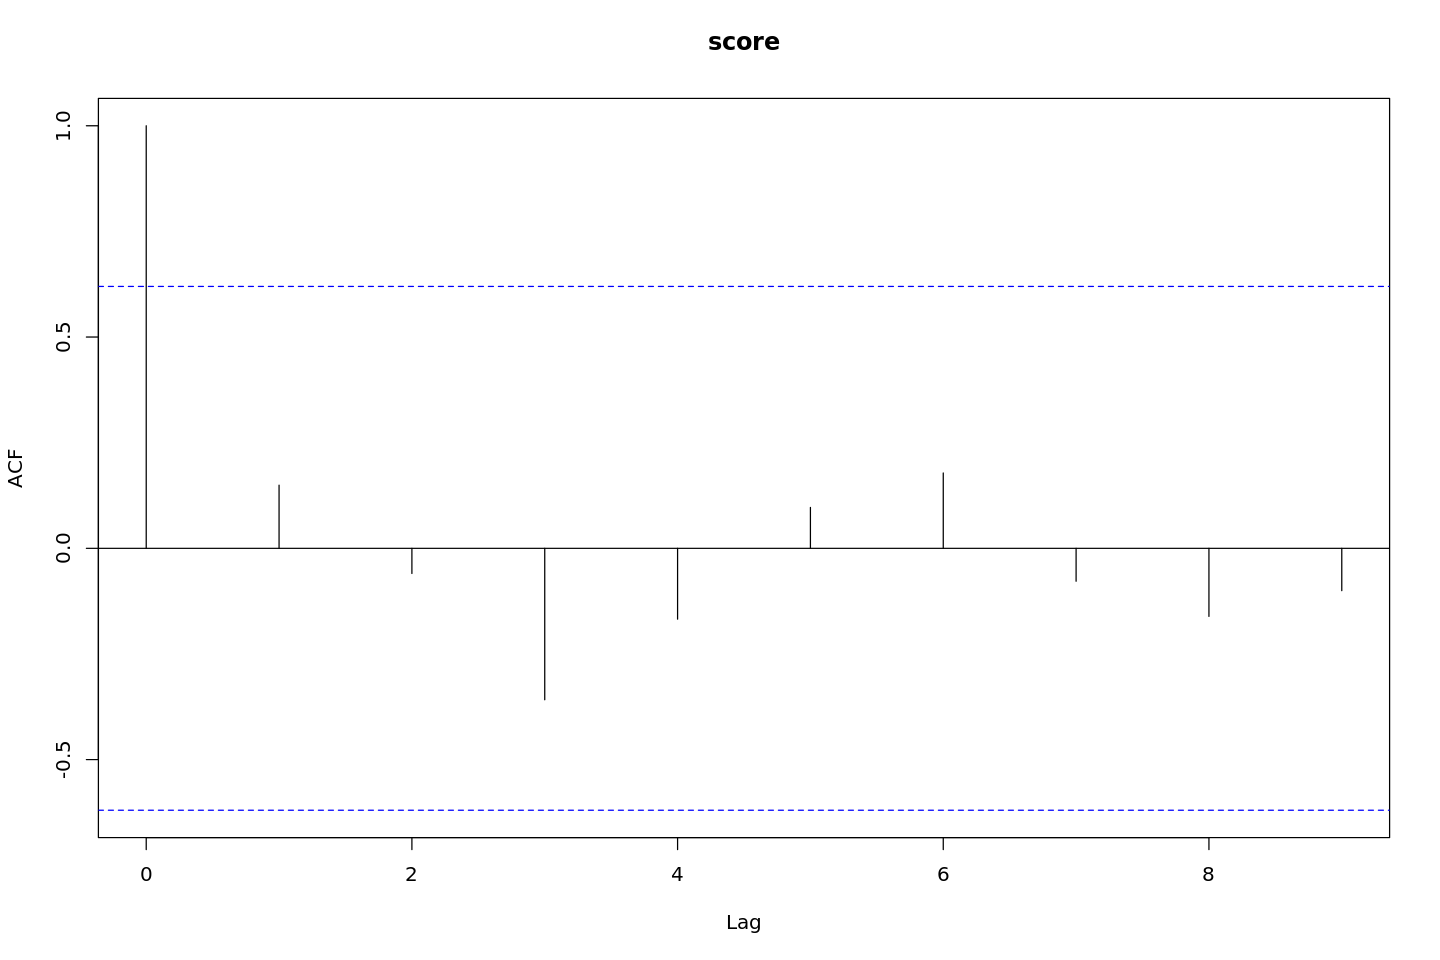

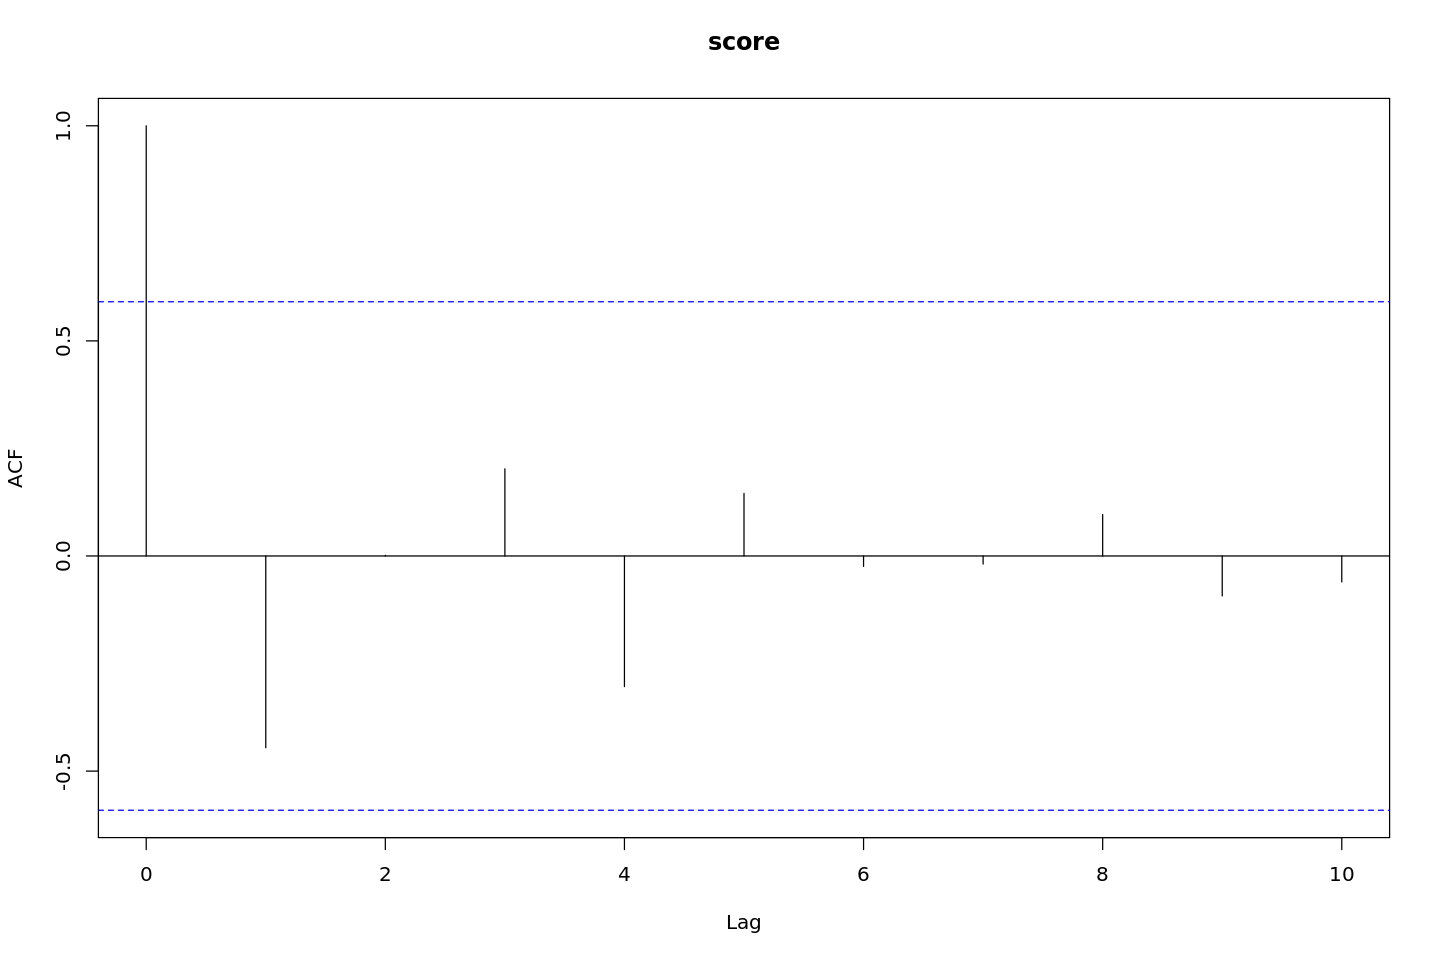

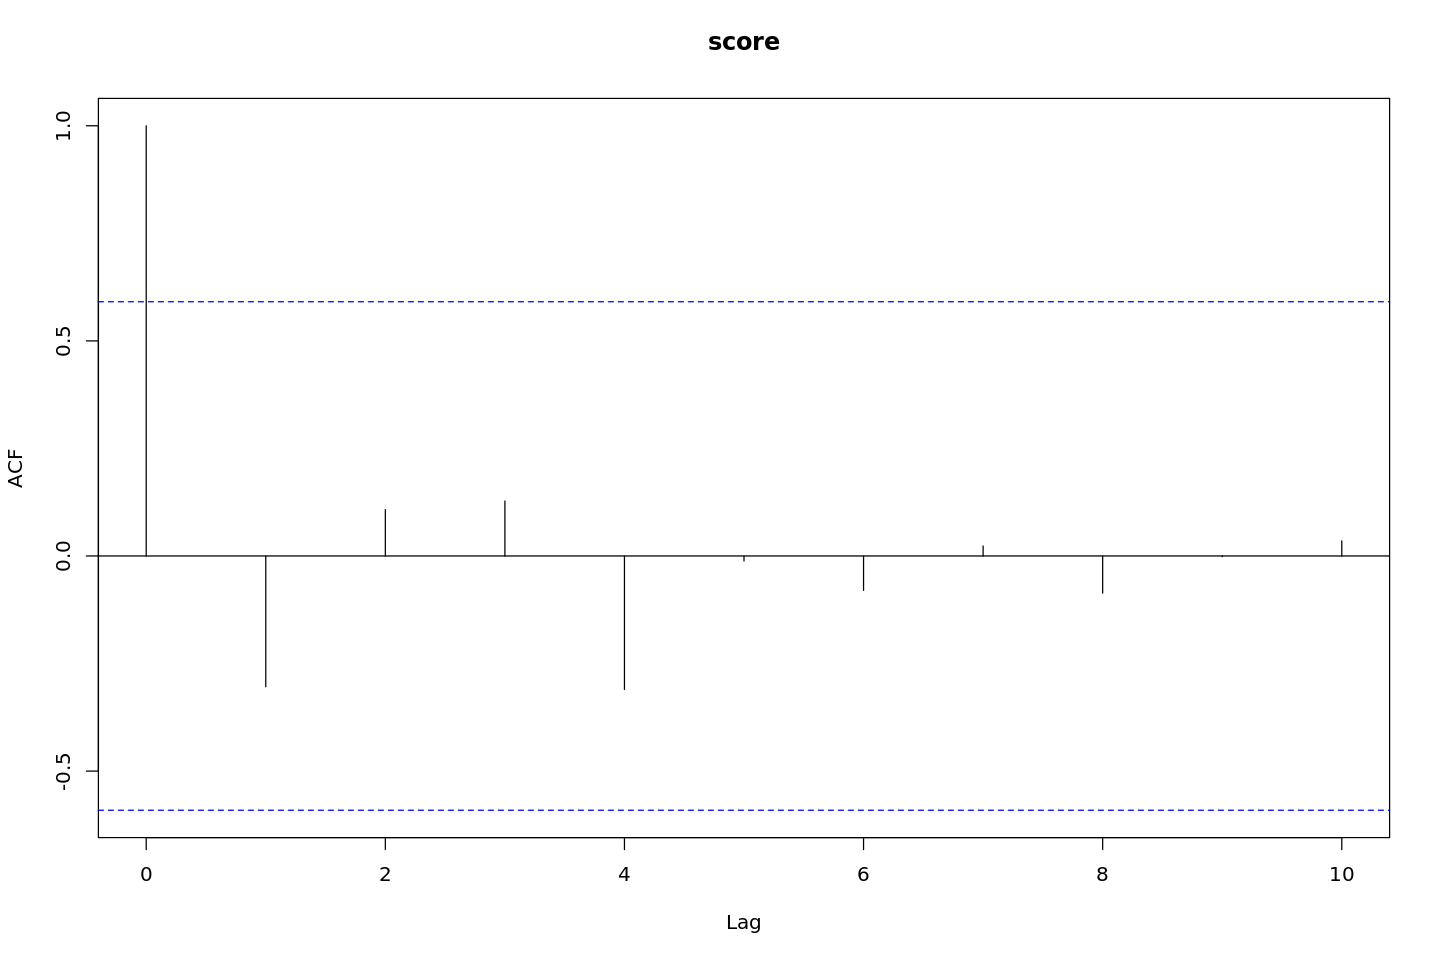

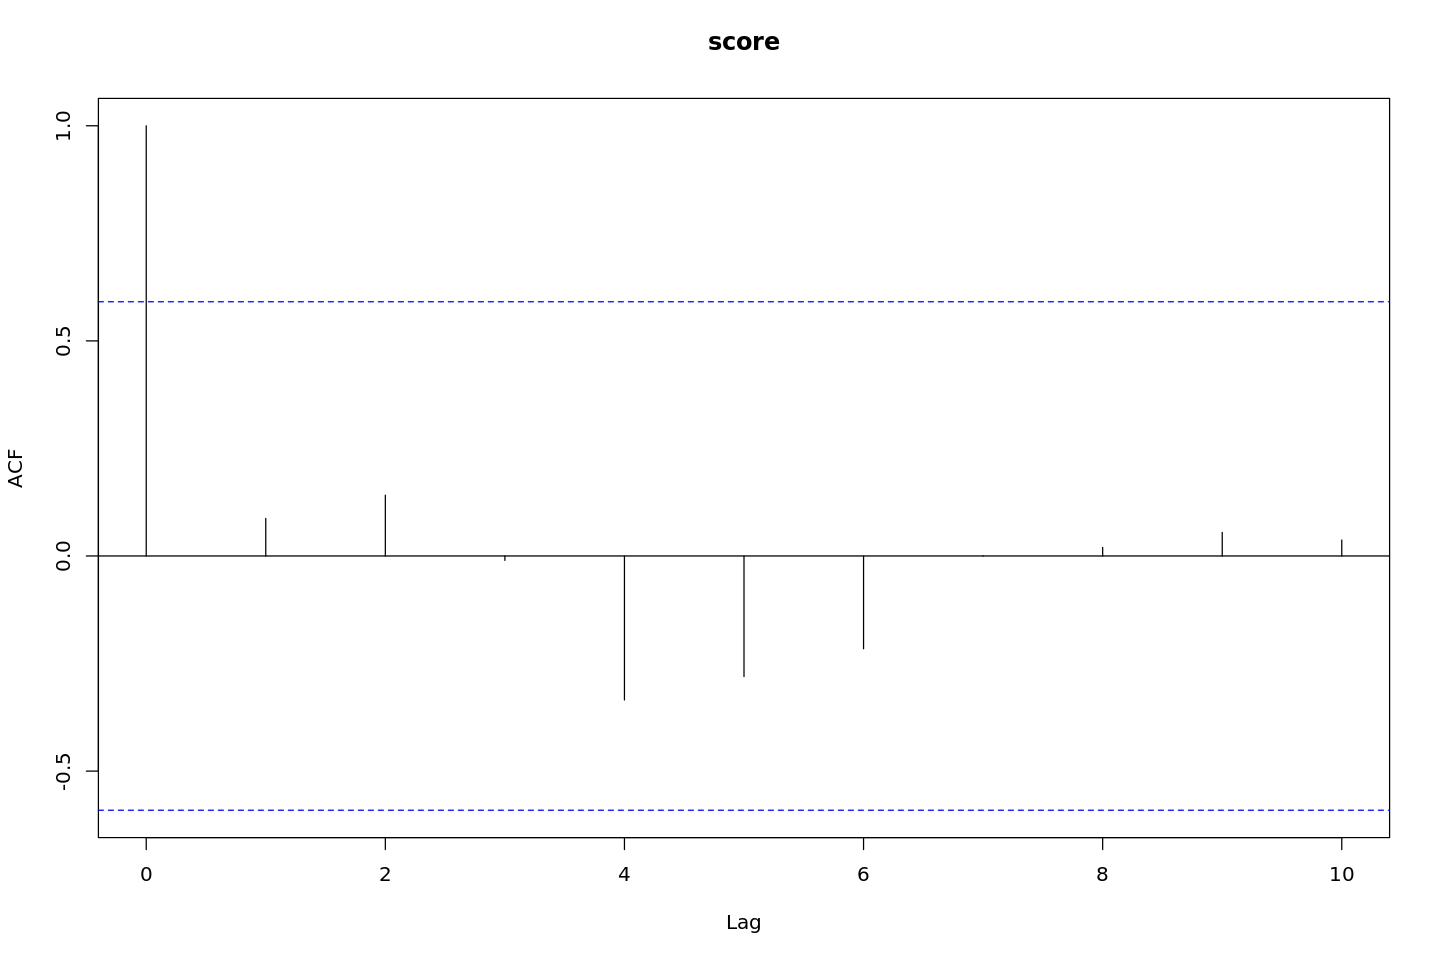

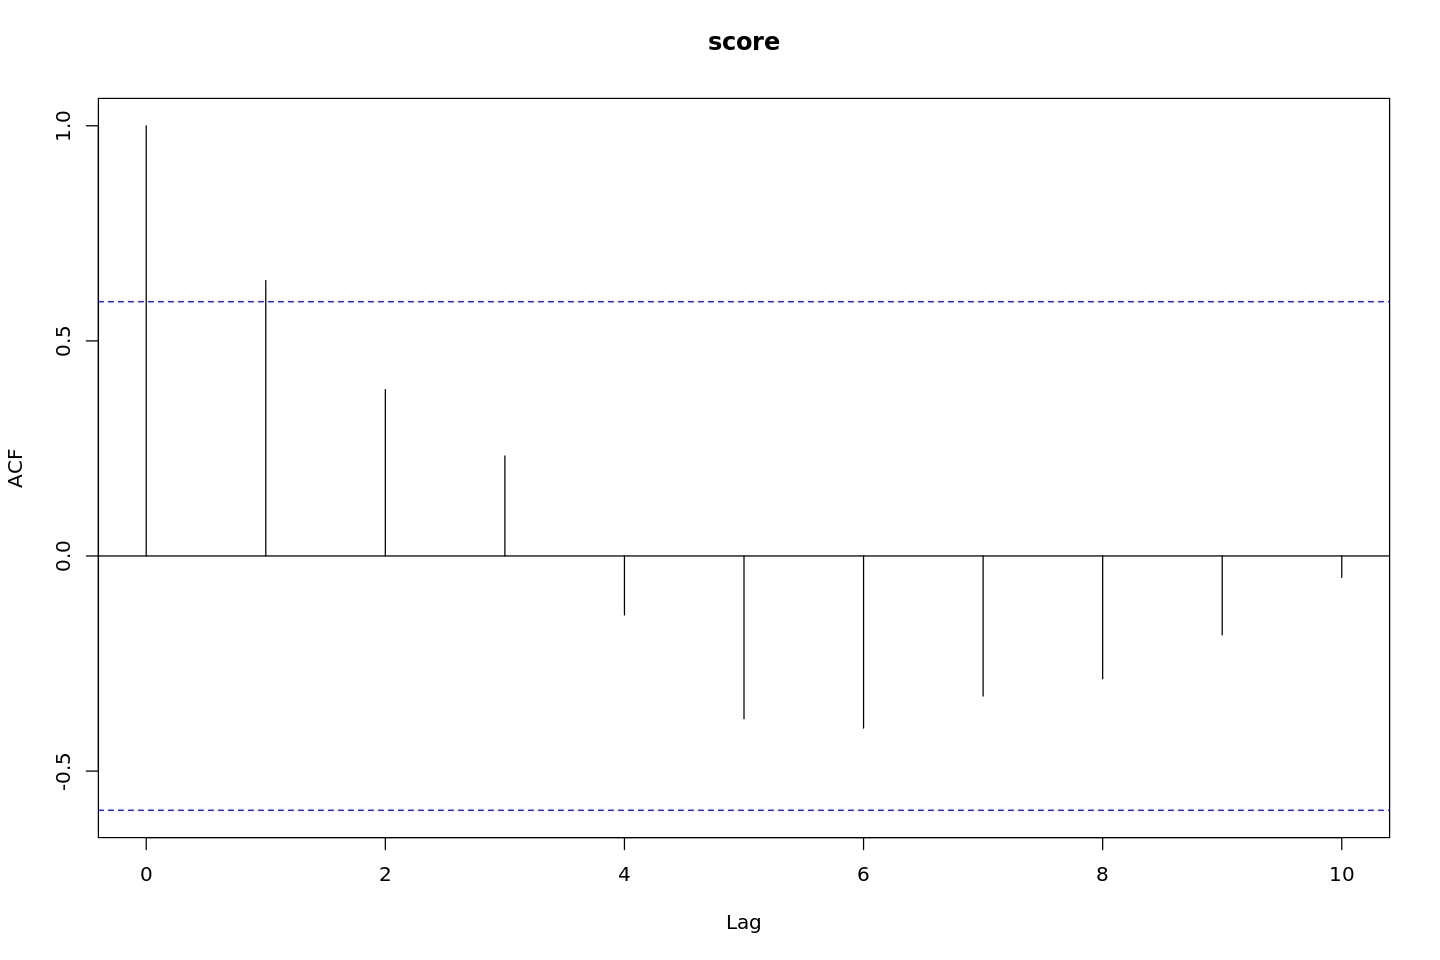

[[1]]

Autocorrelations of series ‘dots[[1L]][[1L]]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.621  0.450  0.269 -0.183 -0.246 -0.413 -0.405 -0.249 -0.240 -0.104 

[[2]]

Autocorrelations of series ‘dots[[1L]][[2L]]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.354  0.368  0.258 -0.166 -0.196 -0.268 -0.374 -0.186 -0.183 -0.107 

[[3]]

Autocorrelations of series ‘dots[[1L]][[3L]]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.236  0.326  0.229 -0.121 -0.086 -0.222 -0.281 -0.174 -0.269 -0.138 

[[4]]

Autocorrelations of series ‘dots[[1L]][[4L]]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.199  0.093  0.038 -0.246 -0.207 -0.156  0.032  0.005  0.091  0.049 

[[5]]

Autocorrelations of series ‘dots[[1L]][[5L]]’, by lag

     0      1      2      3      4      5      6      7      8

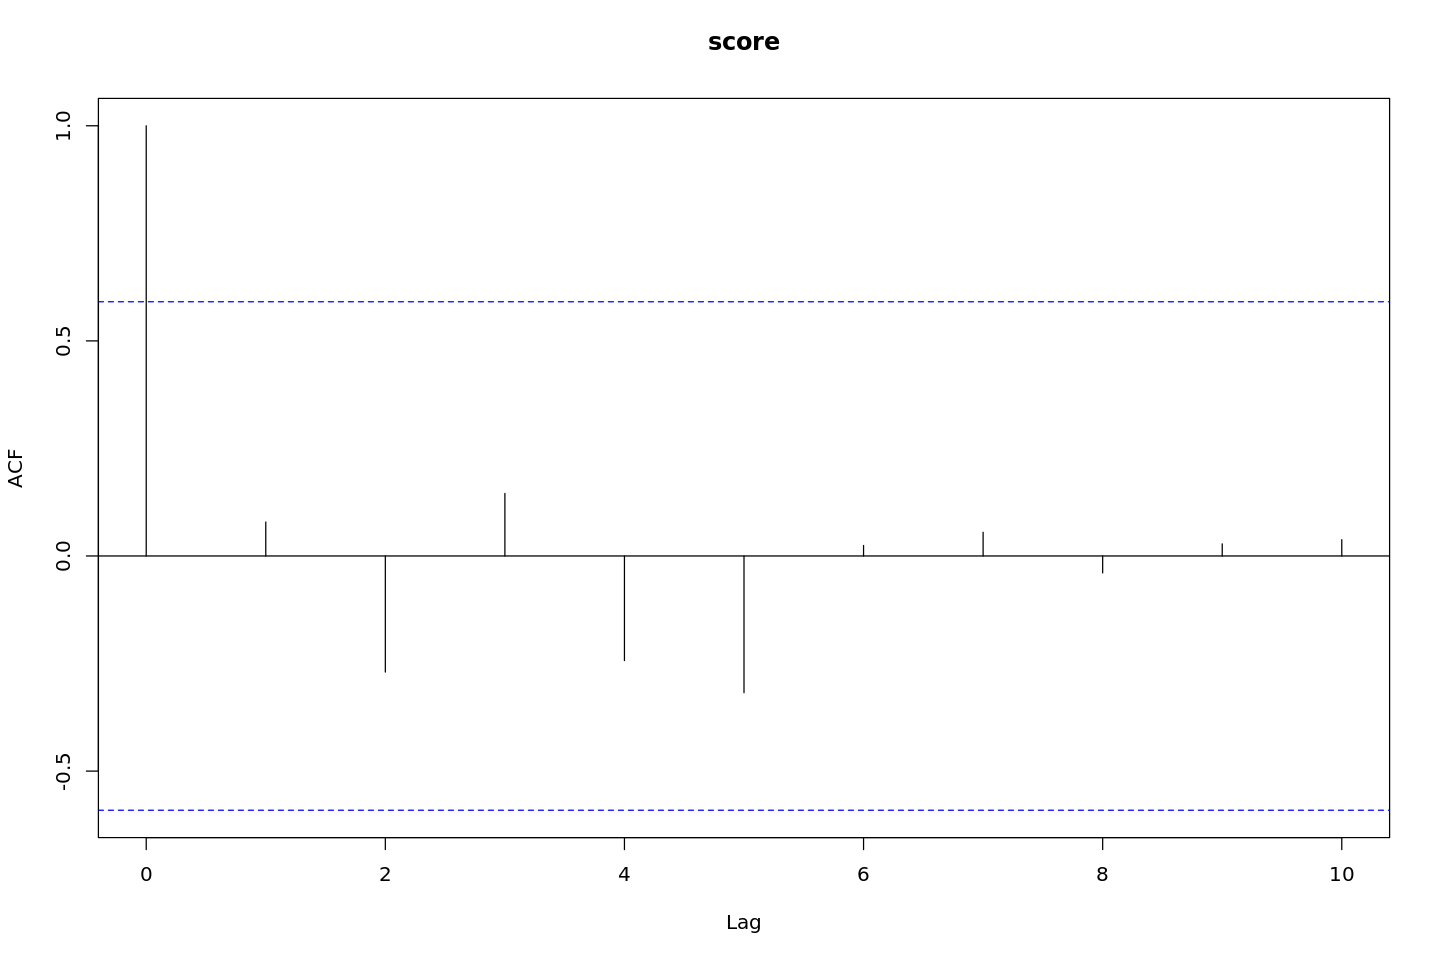

In [54]:
#ACF quick visual
measure.data.filtered %>%
    filter(provider_id <= 10021) %>%
    select(provider_id, score) %>%
    group_by(provider_id) %>%
    group_map(acf, na.action= na.exclude)

### ACF Value Matrix

In [55]:
ac_scores <- 
    measure.data.filtered %>%
    select(provider_id, score) %>%
    group_by(provider_id)%>%
    group_map(acf, plot = FALSE, na.action= na.exclude)

unlisted <- ac_scores %>% unlist(recursive = FALSE)

acfs <- unlisted[names(unlisted) == "acf"]

acf.matrix <- acfs %>% 
    lapply(head, 8) %>% 
    do.call(rbind, .)

In [56]:
colnames(acf.matrix) <- paste("Lag", 0:7)

In [57]:
acf.matrix %>% head()

,Lag 0,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7
acf,1,0.6211513,0.44987535,0.26944254,-0.1833617,-0.24573949,-0.41334646,-0.40519453
acf,1,0.3538202,0.36841583,0.25770698,-0.1661756,-0.19608367,-0.26800739,-0.37357047
acf,1,0.2359664,0.32648166,0.22856961,-0.1214634,-0.08563432,-0.22217900,-0.28062606
acf,1,-0.1988293,0.09269907,0.03781451,-0.2456359,-0.20744119,-0.15595183,0.03190410
acf,1,0.1494149,-0.05948049,-0.35834008,-0.1675861,0.09675262,0.17830550,-0.07784910
acf,1,-0.4458191,0.00146845,0.20258363,-0.3035912,0.14525173,-0.02419528,-0.01881931


### Ridgeline Plot 

Looking at all providers confirms this trend on a broader scale- there is a significant correlation between many providers' current score and their past two previous scores (lag 1 and lag 2). Lag 1 and Lag 2 should therefore be included in the model features. 

Picking joint bandwidth of 0.0259



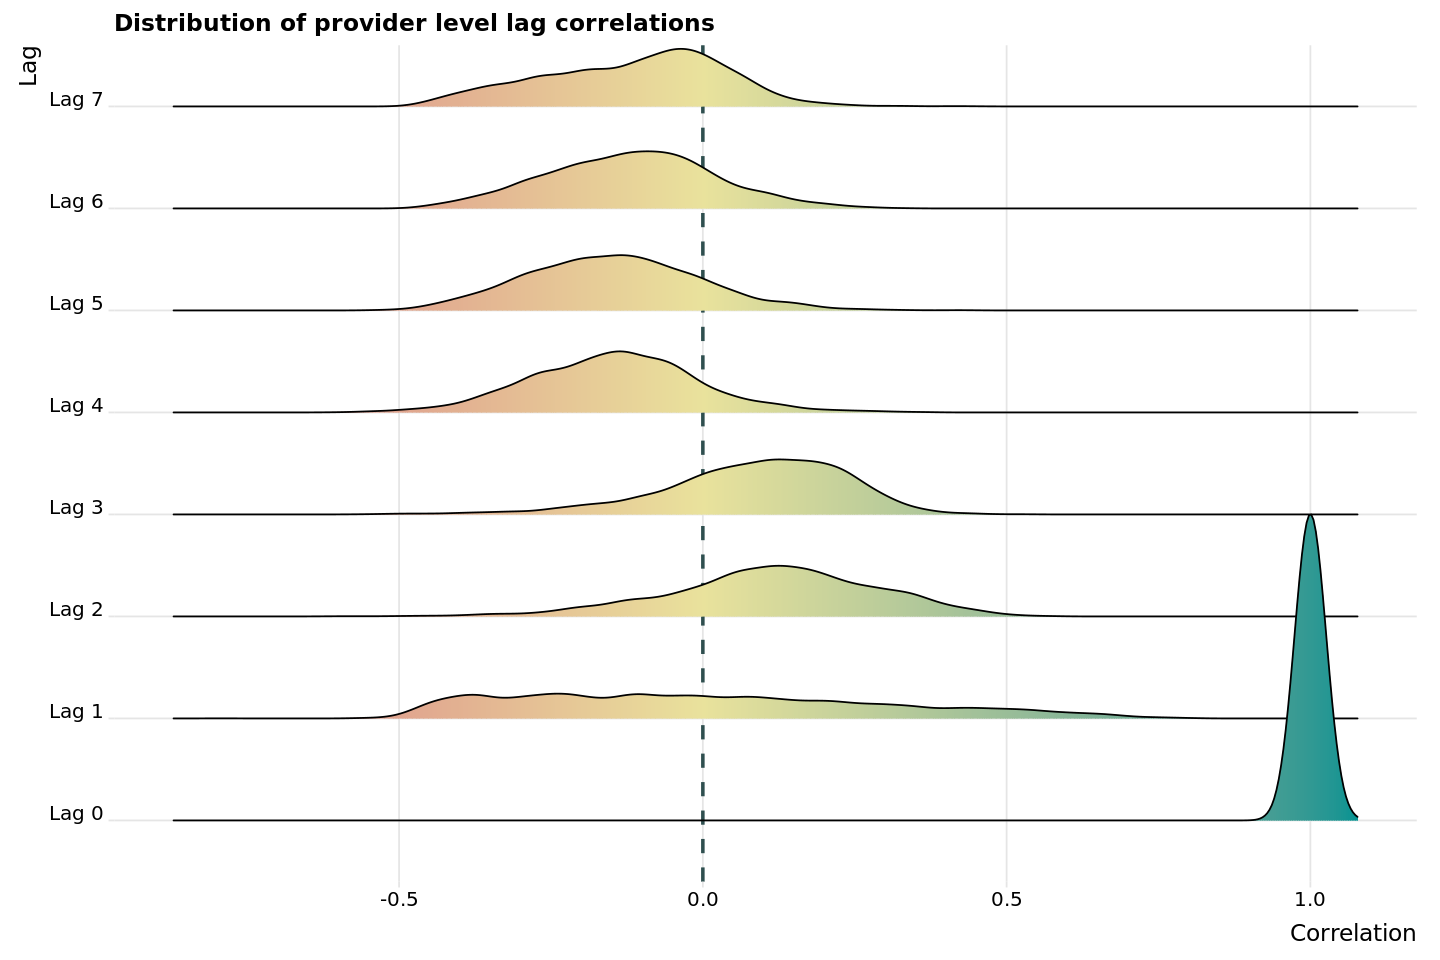

In [58]:
options(repr.plot.width=12, repr.plot.height=8)
acf.matrix %>% 
    as.data.frame() %>% 
    gather(Lag, Correlation) %>%
    mutate(Lag = as.factor(Lag)) %>%
    mutate(Lag = fct_relevel(Lag, paste("Lag",0:7))) %>%
    ggplot(aes(x = Correlation, y = Lag, fill = ..x..)) + 
        geom_vline(
            xintercept=0, 
            color = "darkslategrey", 
            linetype = 'dashed', 
            size = 1) +
        geom_density_ridges_gradient(scale = 3, alpha = 0.2) +
        scale_fill_gradient2(
            low = "#cf597e",
            mid = "#e9e29c",
            high = "#009392",
            space = "Lab",
            na.value = "grey50",
            guide = "colourbar",
            aesthetics = "fill") + 
        theme_ridges() + 
        ggtitle("Distribution of provider level lag correlations") +
        theme(legend.position = "none")
